In [1]:
import uncertainpy as un
import chaospy as cp
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

/home/simen/anaconda3/envs/uncertainpy/lib/python2.7/site-packages/h5py-2.7.1-py2.7-linux-x86_64.egg/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Create the coffee cup model function

In [2]:
def coffee_cup(kappa, T_env):
    # Initial temperature and time array
    time = np.linspace(0, 200, 150)            # Minutes
    T_0 = 95                                   # Celsius

    # The equation describing the model
    def f(T, time, kappa, T_env):
        return -kappa*(T - T_env)

    # Solving the equation by integration.
    temperature = odeint(f, T_0, time, args=(kappa, T_env))[:, 0]

    # Return time and model output
    return time, temperature

Create a model from the coffee_cup function and add labels

In [3]:
model = un.Model(run=coffee_cup, labels=["Time (min)", "Temperature (C)"])

Create the distributions

In [4]:
kappa_dist = cp.Uniform(0.025, 0.075)
T_env_dist = cp.Uniform(15, 25)

Define the parameters dictionary

In [5]:
parameters = {"kappa": kappa_dist, "T_env": T_env_dist}

and use it to create the parameters

In [6]:
parameters = un.Parameters(parameters)

Set up the uncertainty quantification

In [7]:
UQ = un.UncertaintyQuantification(model=model, parameters=parameters)

Perform the uncertainty quantification using polynomial chaos with point collocation (by default)

In [8]:
data = UQ.quantify()

Calculating statistics from PCE: 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


Saving data as: data/coffee_cup.h5


Creating plots using the result stored in `data` as a `Data` object.

Text(0,0.5,u'Temperature (C)')

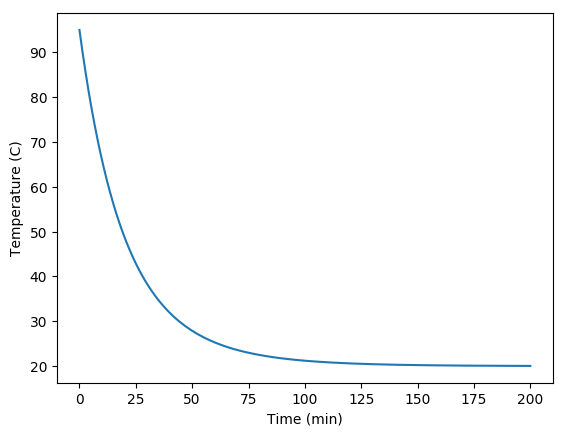

In [9]:
plt.plot(data["coffee_cup"].time, data["coffee_cup"].mean)
plt.xlabel(data["coffee_cup"].labels[0])
plt.ylabel(data["coffee_cup"].labels[1])